<a href="https://colab.research.google.com/github/nicolej88/programming-for-data-portfolio/blob/main/R_Life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Life Expectancy 
---

Using what you learnt in the previous worksheet, you will be performing a multiple linear regression on the life expectancy dataset. You will be using your statistical knowledge to see which (if any) of the variables predict life expectancy.  

URL = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/Life%20Expectancy%20Data.csv"

### **The data in question:**

The variables:

* Country 
* Year 
* Status - developing or developed status
* Life expectancy - in age (Target variable or IV)
* Adult mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infant deaths - Number of Infant Deaths per 1000 population
* Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* Percentage expenditure - Expenditure on health as a percentage of GDP per capita(%)
* Hepititis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles - Measles - number of reported cases per 1000 population
* BMI - Average Body Mass Index of entire population
* Under five deaths - Number of under-five deaths per 1000 population
* Polio - Polio immunization coverage among 1-year-olds (%)
* Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria - Diphtheria tetanus toxoid and pertussis immunization coverage among 1-year-olds (%)
* Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP - per capita in USD 
* Population
* thinness 10-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
* thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)
* Income composition - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling - Number of years of Schooling(years)

**Run the cell block below to install and load the necessary packages**

In [3]:
# this code needs to be run once to install the packages on your system
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("fastDummies")

# this code needs to be run to open the packages 

# tidyverse includes dpylr which includes all the functions such as mutate, select, summarise etc
#library("tidyverse")

# ggplot2 contains all the visualisation tools (similar to matplotlib)
library("ggplot2")

# fastdummies is for dummy coding
library("fastDummies")

# displaying in real numbers rather than in scientific form 

options(scipen = 999)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Exercise 1 - planning 
---

Make a note of which variable will be the IV and which variables will be used as the DVs


In [ ]:
# # Life expectancy - in age  = dependent variable

# Independent variables
# * Country 
# * Year 
# * Status - developing or developed status
# * Adult mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
# * infant deaths - Number of Infant Deaths per 1000 population
# * Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
# * Percentage expenditure - Expenditure on health as a percentage of GDP per capita(%)
# * Hepititis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
# * Measles - Measles - number of reported cases per 1000 population
# * BMI - Average Body Mass Index of entire population
# * Under five deaths - Number of under-five deaths per 1000 population
# * Polio - Polio immunization coverage among 1-year-olds (%)
# * Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)
# * Diphtheria - Diphtheria tetanus toxoid and pertussis immunization coverage among 1-year-olds (%)
# * Deaths per 1 000 live births HIV/AIDS (0-4 years)
# * GDP - per capita in USD 
# * Population
# * thinness 10-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
# * thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)
# * Income composition - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
# * Schooling - Number of years of Schooling(years)

### Exercise 2 - read and inspect the data 
---
1. Set the data into a dataframe 
2. Inspect the data 

In [4]:
 url= "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/Life%20Expectancy%20Data.csv"

life_expectancy_data <- read_csv(url)

head(life_expectancy_data)
summary(life_expectancy_data)



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  Country = col_character(),
  Status = col_character()
)
ℹ Use `spec()` for the full column specifications.




Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,⋯,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


   Country               Year         Status          Life expectancy
 Length:2938        Min.   :2000   Length:2938        Min.   :36.30  
 Class :character   1st Qu.:2004   Class :character   1st Qu.:63.10  
 Mode  :character   Median :2008   Mode  :character   Median :72.10  
                    Mean   :2008                      Mean   :69.22  
                    3rd Qu.:2012                      3rd Qu.:75.70  
                    Max.   :2015                      Max.   :89.00  
                                                      NA's   :10     
 Adult Mortality infant deaths       Alcohol        percentage expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:228.0   3rd Qu.:  22.0   3rd Qu.: 7.7025   3rd Qu.:  441

### Exercise 3 - clean the data 
---

1. Check for NA values
2. Remove NA values if necessary 

In [5]:
is.na(life_expectancy_data)

life_expectancy_data <- na.omit(life_expectancy_data)




Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,⋯,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


### Exercise 4 - dummy code 
---
1. dummy code the `status` variable 
2. make sure to remove first dummy and old column 

In [6]:
status_dummy <- dummy_cols(life_expectancy_data, select_columns = c('Status'), remove_first_dummy = TRUE, remove_selected_columns = TRUE)
head(status_dummy)

Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,⋯,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,2015,65.0,263,62,0.01,71.279624,65,1154,19.1,⋯,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1,1
Afghanistan,2014,59.9,271,64,0.01,73.523582,62,492,18.6,⋯,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0,1
Afghanistan,2013,59.9,268,66,0.01,73.219243,64,430,18.1,⋯,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9,1
Afghanistan,2012,59.5,272,69,0.01,78.184215,67,2787,17.6,⋯,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8,1
Afghanistan,2011,59.2,275,71,0.01,7.097109,68,3013,17.2,⋯,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5,1
Afghanistan,2010,58.8,279,74,0.01,79.679367,66,1989,16.7,⋯,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2,1


### Exercise 5 - visualise target variable (IV)
---

1. Visualise target variable on a histogram
2. How does the distribution look?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



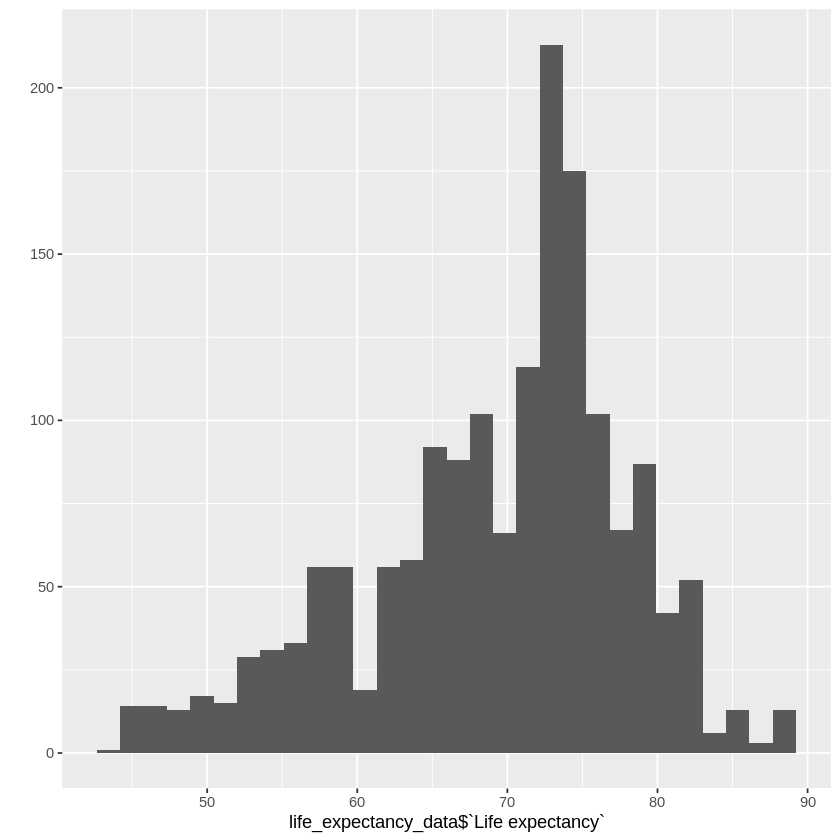

In [15]:
qplot(life_expectancy_data$`Life expectancy`, geom="histogram")

Data looks to be normally distributed.

### Exercise 6 - perform multiple linear regression 
---

1. Run a linear regression to see if your target variables predict life expectancy 
2. display a summary of the regression 

In [7]:
life_expectancy_model <- lm(`Life expectancy` ~ `Year`  +	`Status_Developing`	+	`Adult Mortality` +	`infant deaths` +	`Alcohol` +	`percentage expenditure` +	`Hepatitis B` +	`Measles` + BMI + `under-five deaths` +	`Polio` +	`Total expenditure` +	`Diphtheria` + `HIV/AIDS` +	`GDP` +	`Population` +	`thinness  10-19 years` +	`thinness 5-9 years` + `Income composition of resources` +	Schooling, data = status_dummy)
summary(life_expectancy_model)


Call:
lm(formula = `Life expectancy` ~ Year + Status_Developing + `Adult Mortality` + 
    `infant deaths` + Alcohol + `percentage expenditure` + `Hepatitis B` + 
    Measles + BMI + `under-five deaths` + Polio + `Total expenditure` + 
    Diphtheria + `HIV/AIDS` + GDP + Population + `thinness  10-19 years` + 
    `thinness 5-9 years` + `Income composition of resources` + 
    Schooling, data = status_dummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.7681  -2.1427   0.0273   2.1776  12.4242 

Coefficients:
                                           Estimate        Std. Error t value
(Intercept)                       309.0071560171969  46.2102371690443   6.687
Year                               -0.1271699785895   0.0230817578617  -5.510
Status_Developing                  -0.8865054108135   0.3352651336995  -2.644
`Adult Mortality`                  -0.0162107362127   0.0009440982548 -17.171
`infant deaths`                     0.0887326991583   0.0105939549952   8.376


### Exercise 7 - summary of results
---
Write some comments on your findings
* what variables significantly predict life expectancy?
* how well do your variables / model account for the variance (change) in life expectancy between countries?
* how does the slope (estimates) for each significant variable explain the impact on the IV 

In [ ]:
variables which significantly predict life expectancy.
Year                                 
Status_Developing                             
`Adult Mortality`                 
`infant deaths`                   
Alcohol                           
BMI                               
`under-five deaths`               
`HIV/AIDS`                        
`Income composition of resources` 
Schooling                         

#2. The independant variables account for 83.86% percent variance of life expectancy between countries.

(Intercept)                       309.0071560171969  46.2102371690443   6.687
Year                               -0.1271699785895   0.0230817578617  -5.510  later year  decreases life expectancy
Status_Developing                  -0.8865054108135   0.3352651336995  -2.644  increased status as a dveloping country decreases life expectancy
`Adult Mortality`                  -0.0162107362127   0.0009440982548 -17.171  increased adult mortality decreases life expectancy
`infant deaths`                     0.0887326991583   0.0105939549952   8.376i increased infant deaths decreases life expectancy
Alcohol                            -0.1313142784030   0.0336576980135  -3.901 increased alcohol consumption decreases life expectancy
BMI                                 0.0318291288693   0.0059550486961   5.345  increased BMI increases life expectancy
`under-five deaths`                -0.0666171827910   0.0076726760464  -8.682   increased under 5 deaths decreases life expectancy
`HIV/AIDS`                         -0.4480547916203   0.0177981425516 -25.174  prevelance of HIV/AIDS decreases life expectancy
`Income composition of resources`  10.4496703034313   0.8326940577170  12.549 income increases life expectancy
Schooling                           0.8948827867361   0.0590999168382  15.142 Schooling increases life expectancy


### Exercise 8 - checking assumptions
--- 

Check your model meets assumptions

1. check linearity plot
2. check Q-Q plot 
3. Does it meet assumptions?

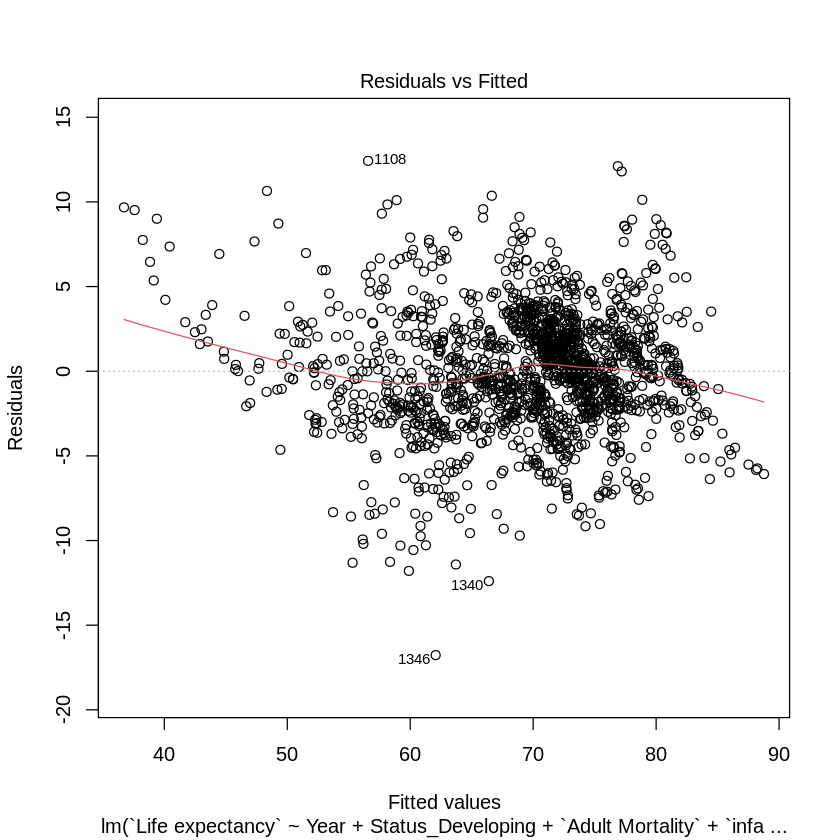

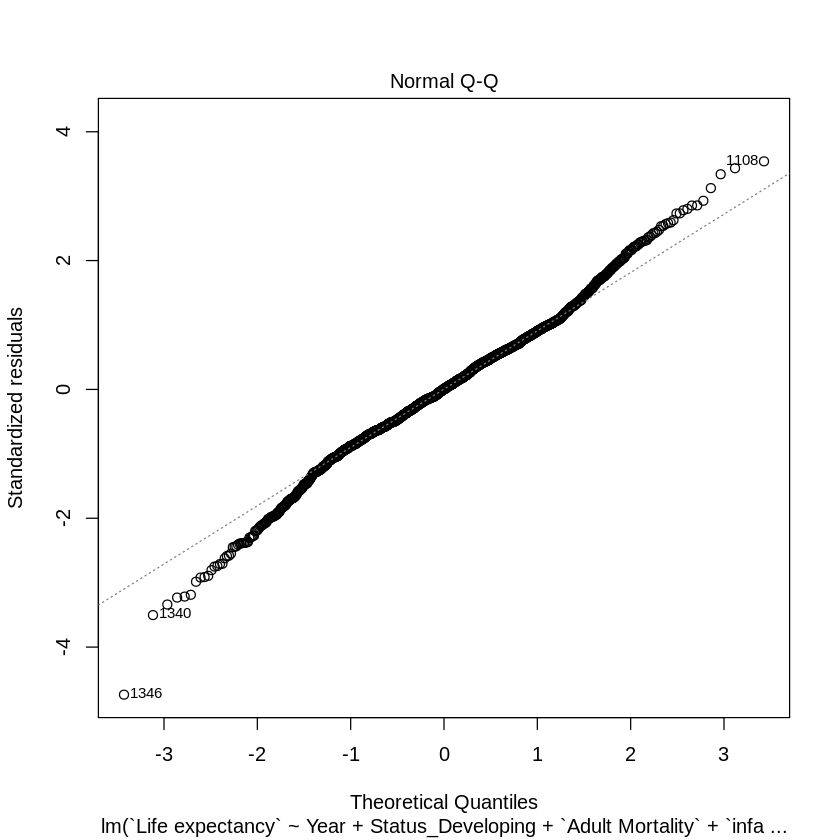

In [8]:
plot(life_expectancy_model, 1)

plot(life_expectancy_model, 2)

#The linearity plot shows a largely horizontal line at 0 meaning that the data has good linearity. The Q-Q plot shows the points following a straight diagonal line meaning the data is normally distributed. 


### Exercise 9 - contextualise 
--- 

Using the results from your analysis, write a few sentences which gives the data meaning 
* tell a story with the data
* what does this tell us about life expectancy?
* what makes the biggest impact on life expectancy?

In [ ]:
The data shows that life expectancy between countries is influenced by many variables. Schooling and income composition of reasources within a country have the biggest impact on a populations life expectancy. The model suggests that as schooling and income increase a country's population life expectancy would also increase.

### Exercise 10 - Explore the data further
---

Try running a regression with a different variable as the target variable (e.g. Status) and see if you can make any further predictions 

In [11]:
schooling_regression <- lm(`Schooling` ~ `Life expectancy` + `Year`  +	`Status_Developing`	+	`Adult Mortality` +	`infant deaths` +	`Alcohol` +	`percentage expenditure` +	`Hepatitis B` +	`Measles` + BMI + `under-five deaths` +	`Polio` +	`Total expenditure` +	`Diphtheria` + `HIV/AIDS` +	`GDP` +	`Population` +	`thinness  10-19 years` +	`thinness 5-9 years` + `Income composition of resources`, data = status_dummy)
summary(schooling_regression)


Call:
lm(formula = Schooling ~ `Life expectancy` + Year + Status_Developing + 
    `Adult Mortality` + `infant deaths` + Alcohol + `percentage expenditure` + 
    `Hepatitis B` + Measles + BMI + `under-five deaths` + Polio + 
    `Total expenditure` + Diphtheria + `HIV/AIDS` + GDP + Population + 
    `thinness  10-19 years` + `thinness 5-9 years` + `Income composition of resources`, 
    data = status_dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4972 -0.8252 -0.0075  0.8081  6.4415 

Coefficients:
                                          Estimate       Std. Error t value
(Intercept)                       -97.328025026768  18.231763909510  -5.338
`Life expectancy`                   0.137948178861   0.009110384086  15.142
Year                                0.047380407454   0.009070815207   5.223
Status_Developing                  -0.240896891405   0.131779730752  -1.828
`Adult Mortality`                   0.000715970341   0.000402451515   1.779
`infant deaths`       

Income composition of resources` has the biggest impact of the IV's used in this model on the levels of schooling in a country's population. The model suggests that as income compostion of reasources is increased within a country schooling levels would increase.

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: Read inspect and clean data ready to perform linear regression using techniques such as writing dummy code. Performing a multiple linear regression a dataset. Using statistical knowledge to see if any variables predict future data. Summarise and visualising results and making conclusions from the models.

## What caused you the most difficulty?

Your answer:  Writing dummy code to clean the data of categorical columns.